In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import string
import random

#### 1. Create a numpy array 'data' of shape (100*3). Perform the operations given below:

In [2]:
arr = np.zeros(shape=(100,3), dtype='object')          #create an empty array of size 100*3

###### i. Fill first column randomly with integers in range [1,100], second column with real numbers in range [-1,1] and third column with alphabets in [a,z]

In [3]:
# Fill first column randomly with integers in range [1,100], 
# second column with real numbers in range [-1,1] 
# and third column with alphabets in [a,z]

np.random.seed(100)
arr[:,0] = np.random.randint(1,101,100)
arr[:,1] = np.random.uniform(-1,1,100)

# filling each element of third column with lowercase letters
# string.ascii_lowercase return all lowercase letters
# random.choice return a randomly selected element from the sequence
for i in range(100):
    arr[i,2] = random.choice(string.ascii_lowercase)

In [4]:
arr[0:20,:]        # first 5 rows of the array    

array([[9, 0.1404318003774494, 'f'],
       [25, -0.8697750027486404, 'v'],
       [68, -0.3731748589485837, 'g'],
       [88, -0.5658684680783557, 'j'],
       [80, 0.05390077749460742, 'b'],
       [49, -0.1457832365885876, 'r'],
       [11, 0.9652608541811447, 't'],
       [95, -0.7190970277311206, 'r'],
       [53, 0.49682320958890425, 'a'],
       [99, 0.5776807856077708, 'j'],
       [54, 0.46079323063099187, 'k'],
       [67, 0.6912366773725747, 'i'],
       [99, 0.11238075743034015, 'h'],
       [15, -0.8862745768276961, 'i'],
       [35, 0.7734491318162333, 'v'],
       [25, -0.3711660991415271, 'x'],
       [16, 0.12078373641349693, 'y'],
       [61, -0.49197120827353613, 'w'],
       [59, 0.8699242094680371, 'k'],
       [17, -0.9315101130500603, 't']], dtype=object)

###### ii. Convert column three to numeric form by using any convenient mapping to integers.

In [5]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()                             # create an object to the class LabelEncoder
arr[:,2] = LE.fit_transform(arr[:,2])           # do LabelEncoding to the third column

In [6]:
arr[0:20,:] 

array([[9, 0.1404318003774494, 5],
       [25, -0.8697750027486404, 21],
       [68, -0.3731748589485837, 6],
       [88, -0.5658684680783557, 9],
       [80, 0.05390077749460742, 1],
       [49, -0.1457832365885876, 17],
       [11, 0.9652608541811447, 19],
       [95, -0.7190970277311206, 17],
       [53, 0.49682320958890425, 0],
       [99, 0.5776807856077708, 9],
       [54, 0.46079323063099187, 10],
       [67, 0.6912366773725747, 8],
       [99, 0.11238075743034015, 7],
       [15, -0.8862745768276961, 8],
       [35, 0.7734491318162333, 21],
       [25, -0.3711660991415271, 23],
       [16, 0.12078373641349693, 24],
       [61, -0.49197120827353613, 22],
       [59, 0.8699242094680371, 10],
       [17, -0.9315101130500603, 19]], dtype=object)

###### iii. Normalize the array obtained in (ii.) using min max normalization.

In [8]:
arr_new = (arr - arr.min())/(arr.max()-arr.min())          #min max normalisation
arr_new[0:10,:]                                            #first 10 rows

array([[0.09968628488176907, 0.01105972088015224, 0.05967234198762548],
       [0.2597420564583435, 0.0009541315472615603, 0.21972811356419988],
       [0.6898919425703871, 0.005921863996071302, 0.06967582771116138],
       [0.8899616570411051, 0.003994256228125021, 0.09968628488176907],
       [0.809933771252818, 0.010194109028100772, 0.019658399093481882],
       [0.49982571382320506, 0.00819657284400119, 0.1797141706700563],
       [0.11969325632884087, 0.01931088654423513, 0.19972114211712808],
       [0.9599860571058564, 0.0024614365192006183, 0.1797141706700563],
       [0.5398396567173487, 0.014624877254189868, 0.009654913369945981],
       [1.0, 0.015433734861534319, 0.09968628488176907]], dtype=object)

###### iv. Calculate the column sum, mean, min and max for all columns.

In [9]:
print('Column-1: Sum= {}, Mean= {}, Min= {}, Max= {}'.format(sum(arr_new[:,0]), arr_new[:,0].mean(), 
                                                                                          min(arr_new[:,0]), max(arr_new[:,0])))

print('Column-2: Sum= {}, Mean= {}, Min= {}, Max= {}'.format(sum(arr_new[:,1]), arr_new[:,1].mean(), 
                                                                                          min(arr_new[:,1]), max(arr_new[:,1])))

print('Column-3: Sum= {}, Mean= {}, Min= {}, Max= {}'.format(sum(arr_new[:,2]), arr_new[:,2].mean(), 
                                                                                          min(arr_new[:,2]), max(arr_new[:,2])))

Column-1: Sum= 50.53276309711498, Mean= 0.5053276309711499, Min= 0.019658399093481882, Max= 1.0
Column-2: Sum= 0.9932317447404054, Mean= 0.009932317447404054, Min= 0.0, Max= 0.01943975076304422
Column-3: Sum= 13.549876377202756, Mean= 0.13549876377202755, Min= 0.009654913369945981, Max= 0.2597420564583435


###### v. Also calculate the row average for all rows and add it as a new column in your array. The resultant array will be of shape: (100,4).

In [10]:
avg = np.zeros((100,1))                               #define an empty array of size 100*1 for saving avg values of each row
for i in range(100):
    avg[i,] = arr_new[i,:].mean()                     #update array avg with average of each row

arr_avg = np.concatenate((arr_new, avg), axis=1)      #concatenate arr_new, avg along column 
arr_avg.shape                                         #shape of the resultant array

(100, 4)

In [11]:
arr_avg[:10,:]

array([[0.09968628488176907, 0.01105972088015224, 0.05967234198762548,
        0.0568061159165156],
       [0.2597420564583435, 0.0009541315472615603, 0.21972811356419988,
        0.16014143385660162],
       [0.6898919425703871, 0.005921863996071302, 0.06967582771116138,
        0.2551632114258733],
       [0.8899616570411051, 0.003994256228125021, 0.09968628488176907,
        0.33121406605033304],
       [0.809933771252818, 0.010194109028100772, 0.019658399093481882,
        0.27992875979146686],
       [0.49982571382320506, 0.00819657284400119, 0.1797141706700563,
        0.22924548577908754],
       [0.11969325632884087, 0.01931088654423513, 0.19972114211712808,
        0.11290842833006802],
       [0.9599860571058564, 0.0024614365192006183, 0.1797141706700563,
        0.3807205547650378],
       [0.5398396567173487, 0.014624877254189868, 0.009654913369945981,
        0.1880398157804948],
       [1.0, 0.015433734861534319, 0.09968628488176907,
        0.3717066732477678]], dtype=ob

###### vi. Resize the normalized array in (iii.) to the shape(3,100). Multiply (Matrix multiplication) this array of shape (3,100) with normalized array of shape(100,3) and find the determinant of the resultant array. 

In [12]:
arr_re = arr_new.reshape(3,100)                                 #reshape the arr_new to 3*100
arr_mult = arr_re @ arr_new                                     #array multiplication between arr_re and arr_new

arr_re.shape,arr_new.shape, arr_mult.shape

((3, 100), (100, 3), (3, 3))

In [13]:
arr_mult

array([[10.778200628725942, 0.20938324675084258, 3.042566182902351],
       [10.451114373708986, 0.2264342905390715, 3.0191890843420794],
       [9.59926126034377, 0.20247825659500698, 3.069640122468201]],
      dtype=object)

In [14]:
det = sp.linalg.det(arr_mult.astype(float))                       #arr_mult.astype(float) convert all element of array to float
print('Determinant of the array= {}'.format(det))                 

Determinant of the array= 0.07889450211590487


###### vii. Flatten the array in (iii.) and calculate the mean of this flattened array. Create another array like data, filled with zeros. Add the mean obtained in this step to each element of newly created array.

In [15]:
arr_flattened = arr_new.flatten()       #flattening arr_new and assign to arr_flattened
arr_flattened.shape,arr_new.shape       #shapes after and before flattening

((300,), (100, 3))

In [16]:
arr_ = np.zeros_like(arr_flattened)     # creating an empty array like arr_flattened
arr_ = arr_ + arr_flattened.mean()      # update arr_ with mean of arr_flattened
arr_ [:20]                              # first 20 element of arr_

array([0.21691957073019358, 0.21691957073019358, 0.21691957073019358,
       0.21691957073019358, 0.21691957073019358, 0.21691957073019358,
       0.21691957073019358, 0.21691957073019358, 0.21691957073019358,
       0.21691957073019358, 0.21691957073019358, 0.21691957073019358,
       0.21691957073019358, 0.21691957073019358, 0.21691957073019358,
       0.21691957073019358, 0.21691957073019358, 0.21691957073019358,
       0.21691957073019358, 0.21691957073019358], dtype=object)

### 2. Pandas

###### i. Load the dataset in a pandas dataframe. Display its shape and the first and last 10 rows in the dataframe.

In [45]:
df = pd.read_csv('HousePrice.csv')         # read data from 'HousePrice.csv' to dataframe df
df.shape                                   # displying shape of df

(4600, 18)

In [46]:
df.head(10)                                # first 10 rows of df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [47]:
df.tail(10)                               # last 10 rows of df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


###### ii. Eliminate the columns titled: 'date', all columns starting with 'sqft_*', 'statezip' and 'country'.

In [48]:
df.drop(['date','statezip','country'], axis=1, inplace=True)
df.drop(list(df.filter(like='sqft_',axis=1).columns), axis=1, inplace=True) #drop all colums starting 'sqft_'

In [49]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,street,city
0,313000.0,3.0,1.50,1.5,0,0,3,1955,2005,18810 Densmore Ave N,Shoreline
1,2384000.0,5.0,2.50,2.0,0,4,5,1921,0,709 W Blaine St,Seattle
2,342000.0,3.0,2.00,1.0,0,0,4,1966,0,26206-26214 143rd Ave SE,Kent
3,420000.0,3.0,2.25,1.0,0,0,4,1963,0,857 170th Pl NE,Bellevue
4,550000.0,4.0,2.50,1.0,0,0,4,1976,1992,9105 170th Ave NE,Redmond


###### iii. Eliminate all columns if more than 50% of its values are set to 0. This is the cleaned dataframe. Display the shape of this cleaned dataframe.

In [50]:
#checking number of zeros in each columns having numerical values
#list of features with numeric values 
features =['price', 'bedrooms', 'bathrooms', 'floors','waterfront','view','condition', 'yr_built','yr_renovated']  

In [51]:
tot_samples = len(df)
for feature in features:
    if len(df[df[feature]== 0]) > tot_samples/2:
        print('No. zeros in {} is {}, so dropped'.format(feature,len(df[df[feature]== 0])))
        df.drop([feature], axis=1, inplace=True)
        
print('\nShape of cleaned dataframe is {}'.format(df.shape))    

No. zeros in waterfront is 4567, so dropped
No. zeros in view is 4140, so dropped
No. zeros in yr_renovated is 2735, so dropped

Shape of cleaned dataframe is (4600, 8)


In [52]:
df.head()

,price,bedrooms,bathrooms,floors,condition,yr_built,street,city
0,313000.0,3.0,1.50,1.5,3,1955,18810 Densmore Ave N,Shoreline
1,2384000.0,5.0,2.50,2.0,5,1921,709 W Blaine St,Seattle
2,342000.0,3.0,2.00,1.0,4,1966,26206-26214 143rd Ave SE,Kent
3,420000.0,3.0,2.25,1.0,4,1963,857 170th Pl NE,Bellevue
4,550000.0,4.0,2.50,1.0,4,1976,9105 170th Ave NE,Redmond


###### iv. Count the number of unique cities. Display pandas dataframe description (df.describe()) specifically for the city 'Seattle'.

In [53]:
# number of unique cities

print('No. of unique cities = {}'.format(df.city.nunique())) # using nunique() method count number of unique values in 
                                                             # particular column

No. of unique cities = 44


In [54]:
# description for samples with city = 'Seattle'
df[df['city']=='Seattle'].describe()

,price,bedrooms,bathrooms,floors,condition,yr_built
count,1.573000e+03,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,5.798375e+05,3.169739,1.962174,1.530833,3.523204,1952.338843
std,4.627382e+05,1.005608,0.807733,0.605454,0.747516,34.712179
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1900.000000
25%,3.690000e+05,3.000000,1.000000,1.000000,3.000000,1925.000000
50%,4.900000e+05,3.000000,2.000000,1.500000,3.000000,1946.000000
75%,6.705000e+05,4.000000,2.500000,2.000000,4.000000,1982.000000
max,1.289900e+07,9.000000,6.250000,3.500000,5.000000,2014.000000


###### v. Using pandas describe the dataset grouped by the number of bedrooms.

In [55]:
df.groupby('bedrooms').describe()                 #describe entire dataset grouped by number of bedrooms

price                                                               \
           count          mean           std        min        25%        50%   
bedrooms                                                                        
0.0          2.0  1.195324e+06  1.418796e+05  1095000.0  1145162.0  1195324.0   
1.0         38.0  2.740763e+05  1.235069e+05        0.0   191000.0   262500.0   
2.0        566.0  3.916219e+05  1.951196e+05        0.0   255000.0   369500.0   
3.0       2032.0  4.886130e+05  6.905088e+05        0.0   300000.0   424750.0   
4.0       1531.0  6.351194e+05  3.808935e+05        0.0   391700.0   568000.0   
5.0        353.0  7.701860e+05  6.646663e+05        0.0   405000.0   580000.0   
6.0         61.0  8.173628e+05  5.913229e+05        0.0   450000.0   665000.0   
7.0         14.0  1.049429e+06  8.522154e+05   280000.0   542500.0   711500.0   
8.0          2.0  1.155000e+06  1.152584e+06   340000.0   747500.0  1155000.0   
9.0          1.0  5.999990e+05           NaN   599999.0   599999.0   599999.0   

                                 bathrooms            ... condition       \
                 75%         max     count      mean  ...       75%  max   
bedrooms                                              ...                  
0.0       1245486.00   1295648.0       2.0  0.000000  ...      3.00  3.0   
1.0        346250.00    540000.0      38.0  1.072368  ...      3.75  5.0   
2.0        482958.75   1695000.0     566.0  1.401943  ...      4.00  5.0   
3.0        565250.00  26590000.0    2032.0  1.996924  ...      4.00  5.0   
4.0        775000.00   4489000.0    1531.0  2.472894  ...      4.00  5.0   
5.0        925000.00   7062500.0     353.0  2.859065  ...      4.00  5.0   
6.0       1125000.00   3100000.0      61.0  2.979508  ...      4.00  5.0   
7.0       1179750.00   3200000.0      14.0  4.285714  ...      3.00  5.0   
8.0       1562500.00   1970000.0       2.0  3.125000  ...      4.50  5.0   
9.0        599999.00    599999.0       1.0  4.500000  ...      3.00  3.0   

         yr_built                                                           \
            count         mean        std     min     25%     50%      75%   
bedrooms                                                                     
0.0           2.0  1990.000000   0.000000  1990.0  1990.0  1990.0  1990.00   
1.0          38.0  1947.289474  33.199567  1906.0  1920.5  1941.5  1966.00   
2.0         566.0  1954.842756  32.748519  1900.0  1928.0  1948.0  1982.75   
3.0        2032.0  1971.444390  28.161154  1900.0  1954.0  1975.5  1994.00   
4.0        1531.0  1976.591117  27.974732  1900.0  1960.0  1983.0  2000.00   
5.0         353.0  1972.586402  29.218690  1900.0  1959.0  1975.0  1999.00   
6.0          61.0  1956.885246  33.111981  1900.0  1924.0  1961.0  1977.00   
7.0          14.0  1964.000000  29.719199  1901.0  1958.0  1964.5  1981.00   
8.0           2.0  1968.000000  12.727922  1959.0  1963.5  1968.0  1972.50   
9.0           1.0  1938.000000        NaN  1938.0  1938.0  1938.0  1938.00   

                  
             max  
bedrooms          
0.0       1990.0  
1.0       2014.0  
2.0       2014.0  
3.0       2014.0  
4.0       2014.0  
5.0       2014.0  
6.0       2014.0  
7.0       2004.0  
8.0       1977.0  
9.0       1938.0  

[10 rows x 40 columns]

In [56]:
df.groupby('bedrooms')['bathrooms'].describe()            #describe column bathroom grouped by number of bedrooms

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0.0,2.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
1.0,38.0,1.072368,0.338458,0.75,1.0000,1.000,1.0000,2.25
2.0,566.0,1.401943,0.543355,0.75,1.0000,1.000,1.7500,3.25
3.0,2032.0,1.996924,0.628068,0.75,1.7500,2.000,2.5000,4.50
4.0,1531.0,2.472894,0.637345,0.75,2.2500,2.500,2.7500,5.50
5.0,353.0,2.859065,0.891566,1.00,2.5000,2.750,3.2500,6.75
6.0,61.0,2.979508,0.973926,1.00,2.2500,2.750,3.5000,5.25
7.0,14.0,4.285714,1.440677,2.50,3.5000,4.125,4.5000,8.00
8.0,2.0,3.125000,0.530330,2.75,2.9375,3.125,3.3125,3.50


###### vi. Remove all house descriptions for which yr_built = 0 or yr_built<2000. Display the shape of this dataframe.

In [57]:
df.drop(df[df['yr_built'] < 2000].index, inplace=True)
df.drop(df[df['yr_built'] ==0].index, inplace=True)
df.shape

(1013, 8)

###### vii. For the dataset obtained in vi. perform column wise normalization for all columns except 'city'.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_new =['price', 'bedrooms', 'bathrooms', 'floors','condition', 'yr_built']#list of remaining features with numeric values
for feature in features_new:
    feature_data = np.array(df[feature]).reshape(-1,1)           #retrieve the feature column as an array, transpose it
    df[feature] = scaler.fit_transform(feature_data)             #normalise the feature_data with standard scaler and assign it
                                                                 #to corresponding column of df
df.head(10)

,price,bedrooms,bathrooms,floors,condition,yr_built,street,city
22,0.055835,-0.556826,-0.675805,1.058476,-0.101281,-0.372678,3140 Franklin Ave E,Seattle
31,-0.273887,0.620762,-0.292924,-0.099446,-0.101281,-0.623025,20120 137th Ave NE,Woodinville
33,0.053219,0.620762,-0.292924,-0.099446,-0.101281,1.880443,17052 4th Ave NE,Shoreline
48,-0.415795,-0.556826,-0.292924,2.216398,-0.101281,-1.374066,2640 NW 56th St,Seattle
49,0.610385,0.620762,-0.292924,-0.099446,-0.101281,-1.374066,15712 NE 136th Pl,Redmond
50,0.066298,0.620762,0.089956,-0.099446,-0.101281,-1.624412,26429 SE 154th Pl,Issaquah
57,0.471748,1.798351,0.855717,-0.099446,-0.101281,-0.122331,7425 Snowberry Ave SE,Snoqualmie
58,-0.574574,-0.556826,0.855717,-0.099446,-0.101281,0.378362,3400 21st Ave W,Seattle
59,-0.809996,-1.734415,-0.292924,-0.099446,-0.101281,0.628709,5944-6082 Delridge Way SW,Seattle
60,-0.129887,0.620762,-0.292924,-0.099446,-0.101281,1.379750,35229 SE Terrace St,Snoqualmie


###### viii. Describe dataframe obtained in (vii.). Also show box plots and histograms for the same.

In [59]:
df.describe()

,price,bedrooms,bathrooms,floors,condition,yr_built
count,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03
mean,-3.244087e-17,-3.507121e-17,-9.469227e-17,-3.875369e-16,-1.427398e-15,8.946666e-15
std,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00
min,-1.581658e+00,-2.912003e+00,-2.973087e+00,-2.415291e+00,-1.012812e-01,-1.624412e+00
25%,-6.007319e-01,-5.568262e-01,-2.929243e-01,-9.944643e-02,-1.012812e-01,-8.733719e-01
50%,-2.554457e-01,-5.568262e-01,-2.929243e-01,-9.944643e-02,-1.012812e-01,-1.223314e-01
75%,3.278786e-01,6.207624e-01,4.728365e-01,-9.944643e-02,-1.012812e-01,6.287092e-01
max,1.016069e+01,4.153528e+00,5.833162e+00,3.374320e+00,1.699835e+01,1.880443e+00


<AxesSubplot:>

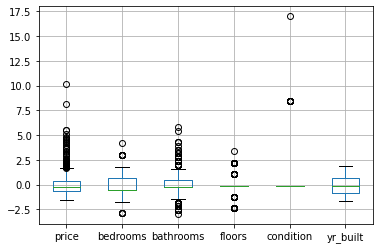

In [62]:
#box plot of all the columns
df.boxplot()

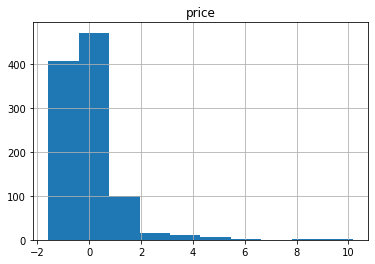

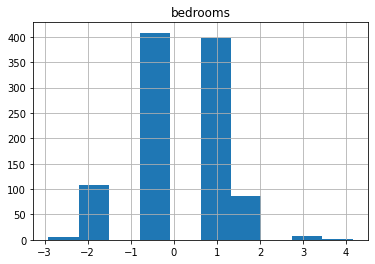

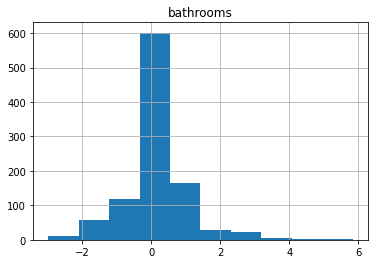

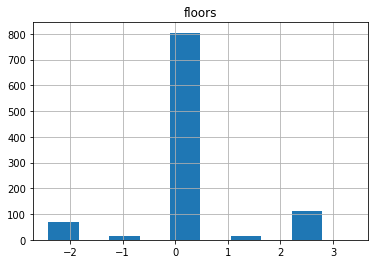

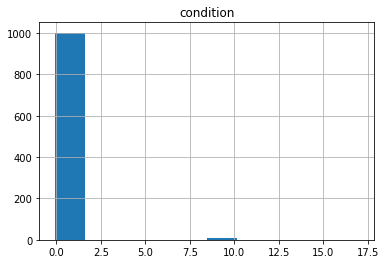

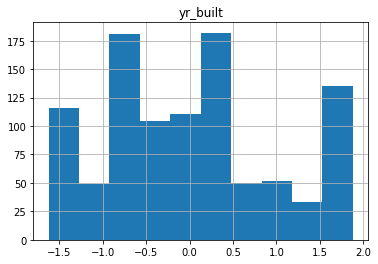

In [41]:
#histogram of all the columns with numeric values seperately
for feature in features_new:
    df.hist(column=feature)

###### ix. Remove outliers based on the observations in (viii.)

(1001, 8)


<AxesSubplot:>

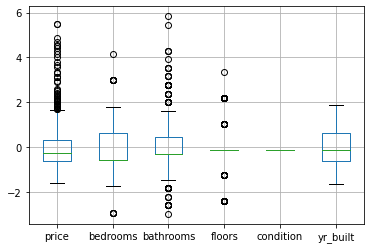

In [63]:
# from the histagram and box plots we can find the outliers as
# price >7.5 is an outlier 
# condition >7.5 is an outlier 

df.drop(df[df['price'] > 7.5].index, inplace=True)                 #drop all samples having price > 10
df.drop(df[df['condition'] > 7.5].index, inplace=True)              #drop all sample having condition > 5

print(df.shape)
df.boxplot()                                                      #showing the boxplot after the outlier removal

###### x. Stored the final cleaned dataset as tab separated '.csv' file.

In [44]:
df.to_csv('submission.csv', sep='\t')